In [6]:
import cv2
import os
import numpy as np

# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [125]:
def Gimage_preprocessing(image):
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(image)
    alpha = 1.5  # Contrast control (adjust as needed)
    beta = 0  # Brightness control
    contrast_enhanced = cv2.convertScaleAbs(clahe_image, alpha=alpha, beta=beta)
    # Thresholding to create a binary image
    _, binary_image = cv2.threshold(contrast_enhanced, 200, 255, cv2.THRESH_BINARY)
    median_filtered_image = cv2.medianBlur(binary_image, 9)
    # Adjust the kernel size as needed
    kernel = np.ones((3, 3), np.uint8)  
    eroded_image = cv2.erode(median_filtered_image, kernel, iterations=1)
    return eroded_image

In [150]:
def ROI_grey(img):
    # Check if the image is not of type uint8
    if img.dtype != np.uint8:
        print("Converting the image to uint8.")
        img = img.astype(np.uint8)
    
    img_h, img_w = img.shape[0], img.shape[1]

    new_w = 200
    new_h = 300
    src = np.float32([[200, 250], [400, 250], [img_w, img_h], [0, img_h]])
    dst = np.float32([[0, 0], [new_w, 0], [new_w // 2 + 70, new_h], [new_w //2 - 70, new_h]])

    # The transformation matrix
    M = cv2.getPerspectiveTransform(src, dst) 

    img = cv2.warpPerspective(
        img,
        M,
        (new_w, new_h),
    )  # Image warping
    return img

In [151]:
def canny(image):
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

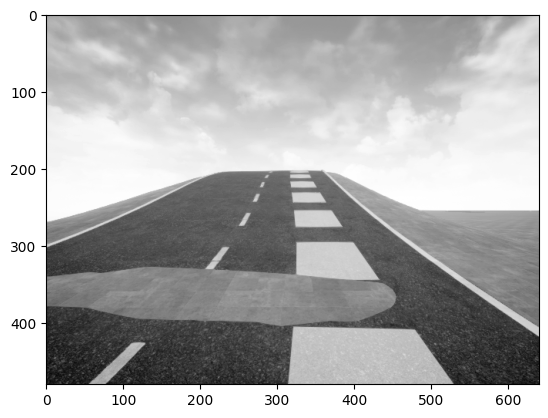

In [152]:
image_path = "./imgs_edge_cases/new_env_small/curved_355_throttle_0.400_steer_0.676.png"

# Read the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

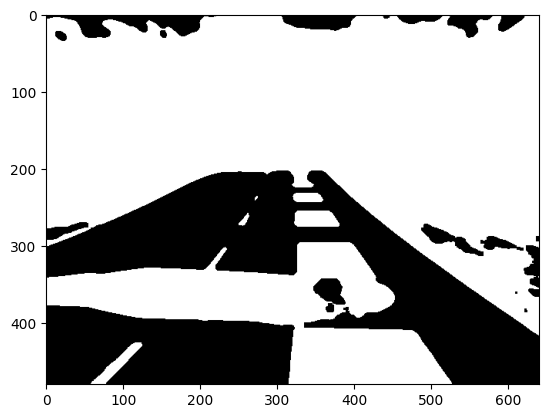

In [153]:
plt.imshow(Gimage_preprocessing(img), cmap="gray")

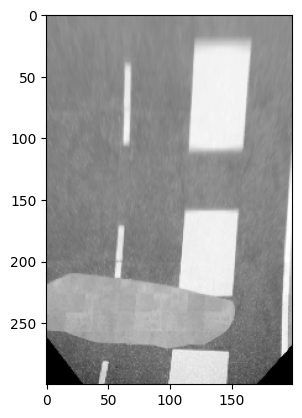

In [154]:
plt.imshow(ROI_grey(img), cmap="gray")

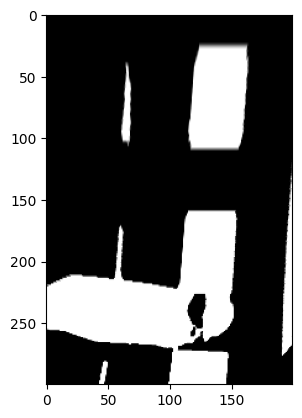

In [155]:
plt.imshow(ROI_grey(Gimage_preprocessing(img)), cmap="gray")

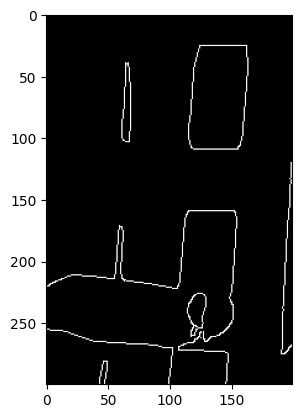

In [156]:
plt.imshow(canny(ROI_grey(Gimage_preprocessing(img))), cmap="gray")